In [8]:
import numpy as np

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
file = np.load('./clean_data.npz')
# file = np.load('./clean_data_sample.npz')

In [22]:
file.files

['X', 'y']

In [30]:
X = file['X']
y = file['y']

In [24]:
X = X[:5000000]
y = y[:5000000]

In [25]:
y[:2],y.shape

(array([False, False]), (5000000,))

In [26]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [31]:
classifer = LogisticRegression(class_weight='balanced')

cv = StratifiedKFold(y, n_folds=3)

In [25]:
# classifer = SGDClassifier(class_weight='balanced')
# cv = StratifiedKFold(y, n_folds=3)

--train--
------- 0  average precision: 0.08175472057112332
------- 0  f1 score: 0.9729243945989008
--train--
------- 1  average precision: 0.06768376960085344
------- 1  f1 score: 0.974235030398203
--train--
------- 2  average precision: 0.06622027862999796
------- 2  f1 score: 0.9693576984876928


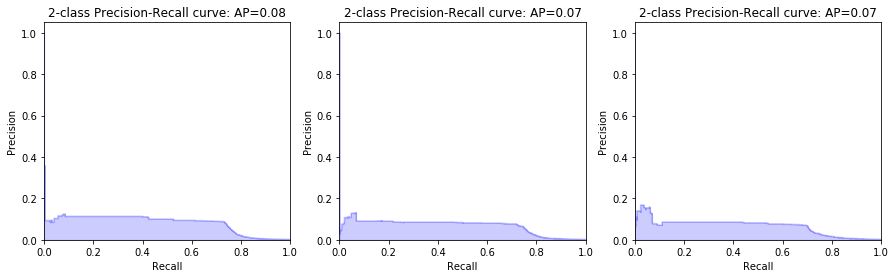

In [28]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


figure(figsize=(15,4))

for i, (train, test) in enumerate(cv):
    print("--train--")
    model = classifer.fit(X[train], y[train])
    probas_ = model.predict_proba(X[test])
    outc = model.predict(X[test])
    # Compute PRC curve and area the curve
    average_precision = average_precision_score(y[test], probas_[:, 1])
    f1 = f1_score(y[test], outc, average='weighted')
    print("-------",i," average precision:", average_precision)
    print("-------",i," f1 score:", f1)
   
    precision, recall, _ = precision_recall_curve(y[test], probas_[:, 1])
    
    ax=subplot(1,3,i+1) #,aspect='equal')
    
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

--train--
--train--
--train--


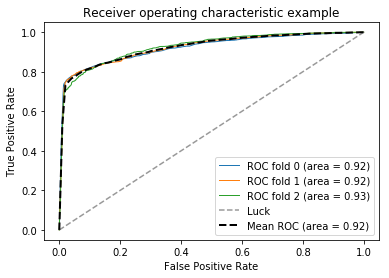

In [29]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    print("--train--")
    probas_ = classifer.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()